In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
from plotnine import *

In [19]:
df=pd.read_csv(r"datafile (1).csv")
df.columns=['Crop','State','cocPHAF','cocPHC','copPQC','Yield']

In [6]:
#Actual column for reference

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ',
       'Difference((A2+FL)-C2)'],
      dtype='object')

In [20]:
df['Diff'] =df['cocPHC']- df['cocPHAF']

In [21]:
df.head()

,Crop,State,cocPHAF,cocPHC,copPQC,Yield,Diff
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,13282.69
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,5935.53
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,6083.08
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,7119.99
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,8139.71


C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret =

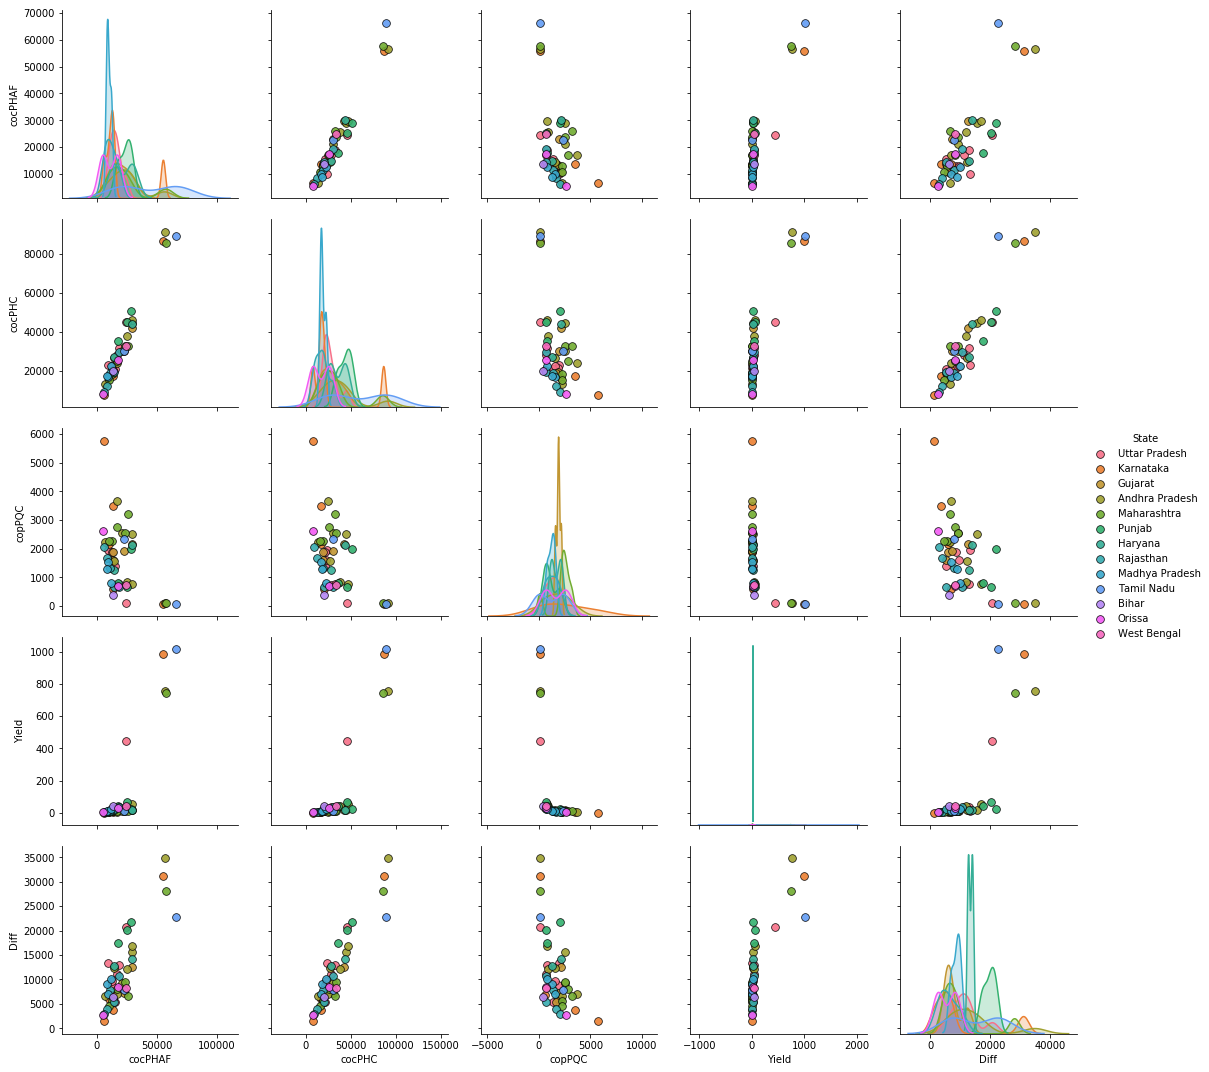

In [24]:
sns.pairplot(df, hue = 'State',diag_kind = 'kde',
             plot_kws = {'alpha': 0.9, 's': 60, 'edgecolor': 'k'},
             size = 3)

In [25]:
crop_df=df.groupby('Crop')

In [26]:
arahar=crop_df.get_group('ARHAR')

C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\stripathi\AppData\Local\Continuum\miniconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret =

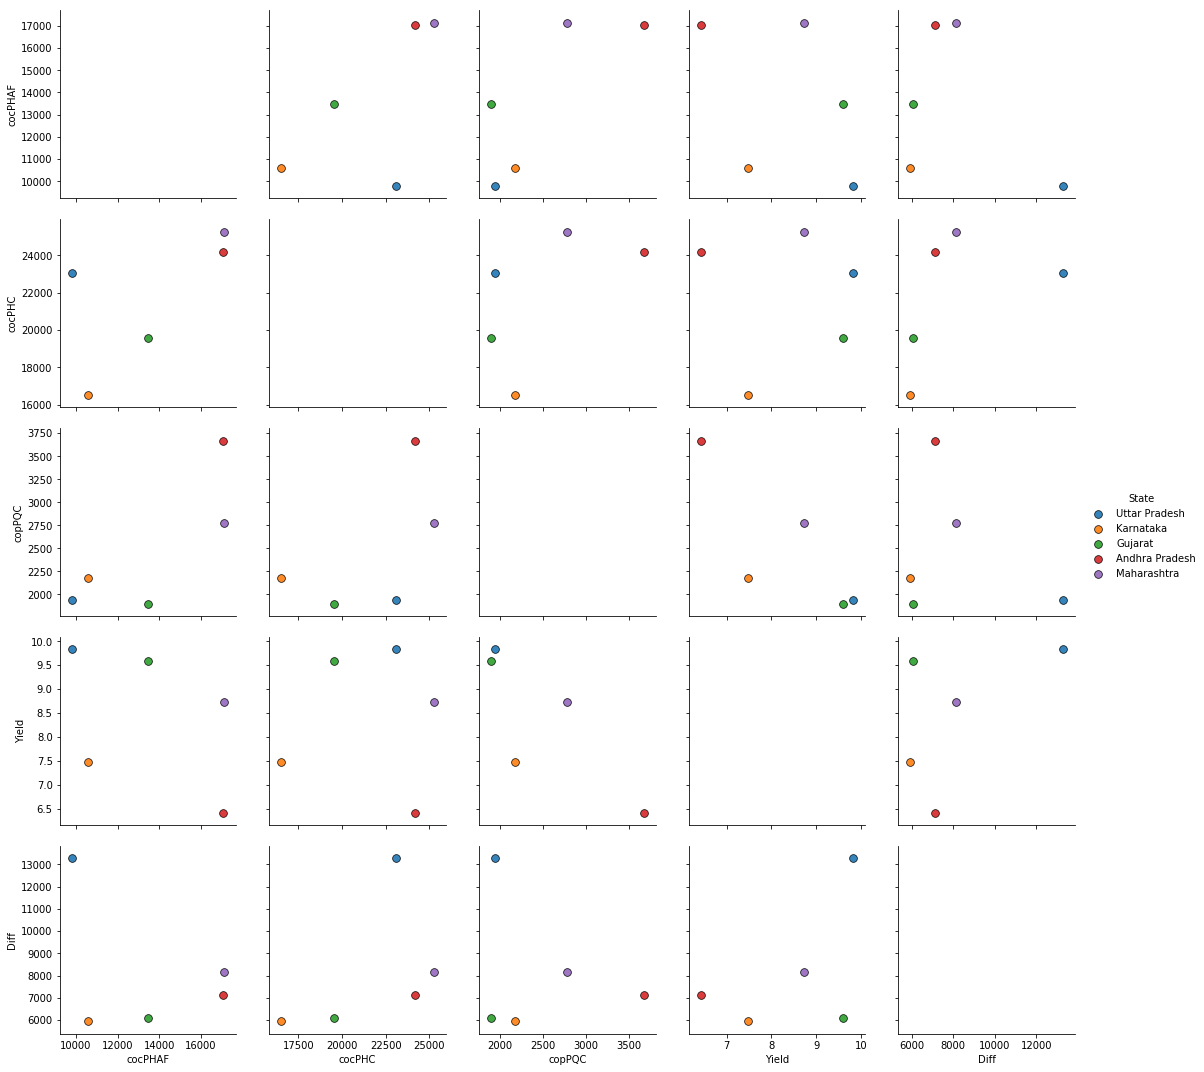

In [27]:
sns.pairplot(arahar, hue = 'State',diag_kind = 'kde',
             plot_kws = {'alpha': 0.9, 's': 60, 'edgecolor': 'k'},
             size = 3)

In [53]:
crops=np.unique((df.Crop.values))
i=0

for crop in crops:
    prod=crop_df.get_group(crop)
    print(crops[i],prod.Diff.mean())#difference between(C2-(A2+FL))
    i+=1

ARHAR 8112.2
COTTON 14671.323999999999
GRAM 7589.264
GROUNDNUT 6905.294
MAIZE 7227.148000000001
MOONG 3657.7259999999997
PADDY 12958.082
RAPESEED AND MUSTARD 8962.942
SUGARCANE 27490.309999999998
WHEAT 12795.9725


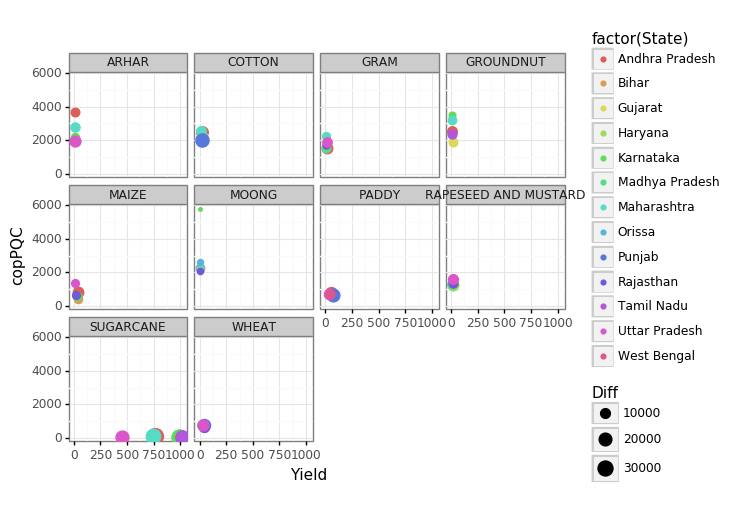

<ggplot: (162971699983)>

In [49]:
(ggplot(df, 
        aes('Yield','copPQC', color='factor(State)',size='Diff'))
        + geom_point() 
        +  facet_wrap('~Crop')
        + theme_bw())

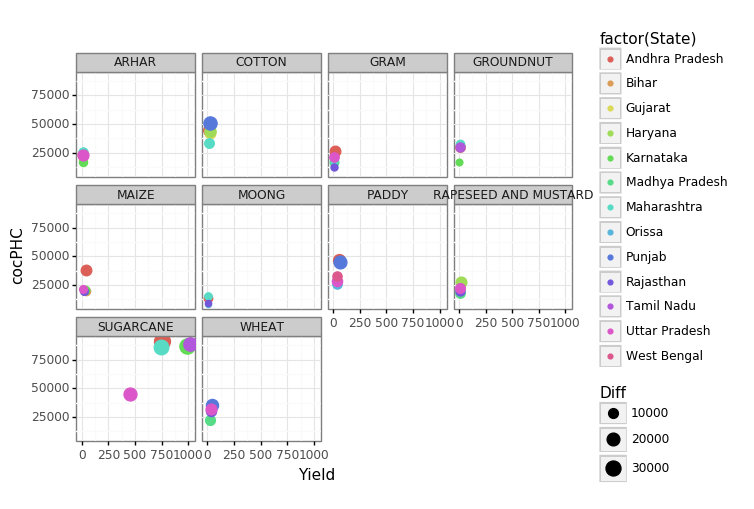

<ggplot: (-9223371873880841647)>

In [51]:
(ggplot(df, 
        aes('Yield','cocPHC', color='factor(State)',size='Diff'))
        + geom_point() 
        +  facet_wrap('~Crop')
        + theme_bw())